#Term Project


##資料分析與前處理


###1. 下載檔案

In [ ]:
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

with open("good.json","r") as f:
    liked = json.load(f)
liked = pd.DataFrame(liked["audio_features"])
liked

with open("dislike.json","r") as f:
    disliked = json.load(f)
disliked = pd.DataFrame(disliked["audio_features"])
disliked

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.357,0.980,6,-6.835,1,0.0790,0.000052,0.843000,0.0768,0.368,96.969,audio_features,4pFC6tuWErxbO61oFFq3BQ,spotify:track:4pFC6tuWErxbO61oFFq3BQ,https://api.spotify.com/v1/tracks/4pFC6tuWErxb...,https://api.spotify.com/v1/audio-analysis/4pFC...,242760,4
1,0.446,0.977,10,-5.036,0,0.0781,0.000535,0.472000,0.1050,0.339,172.059,audio_features,6V3SNkvi4BnfmZU0j7s9TQ,spotify:track:6V3SNkvi4BnfmZU0j7s9TQ,https://api.spotify.com/v1/tracks/6V3SNkvi4Bnf...,https://api.spotify.com/v1/audio-analysis/6V3S...,284400,4
2,0.291,0.980,1,-5.138,1,0.1530,0.001270,0.091000,0.1020,0.257,79.792,audio_features,1Ds58cpyJzL0YTKk02vh1C,spotify:track:1Ds58cpyJzL0YTKk02vh1C,https://api.spotify.com/v1/tracks/1Ds58cpyJzL0...,https://api.spotify.com/v1/audio-analysis/1Ds5...,270920,4
3,0.462,0.974,1,-5.820,1,0.0816,0.000029,0.723000,0.0751,0.399,107.877,audio_features,77QKNMGwlnzxsTZPYfByMu,spotify:track:77QKNMGwlnzxsTZPYfByMu,https://api.spotify.com/v1/tracks/77QKNMGwlnzx...,https://api.spotify.com/v1/audio-analysis/77QK...,186576,3
4,0.338,0.988,8,-7.290,0,0.0865,0.000083,0.833000,0.0377,0.449,99.046,audio_features,3bQoMbPYOvvseHaSOWAQ3Q,spotify:track:3bQoMbPYOvvseHaSOWAQ3Q,https://api.spotify.com/v1/tracks/3bQoMbPYOvvs...,https://api.spotify.com/v1/audio-analysis/3bQo...,221960,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.798,0.746,10,-8.639,1,0.0313,0.030400,0.361000,0.0703,0.965,128.553,audio_features,1QqsAlhs7pxcXs9BMB1Nv5,spotify:track:1QqsAlhs7pxcXs9BMB1Nv5,https://api.spotify.com/v1/tracks/1QqsAlhs7pxc...,https://api.spotify.com/v1/audio-analysis/1Qqs...,655213,4
91,0.651,0.811,10,-13.870,1,0.0318,0.064800,0.029300,0.1000,0.962,112.126,audio_features,6VuIKS2Z27jCutIapgCUZF,spotify:track:6VuIKS2Z27jCutIapgCUZF,https://api.spotify.com/v1/tracks/6VuIKS2Z27jC...,https://api.spotify.com/v1/audio-analysis/6VuI...,186573,4
92,0.705,0.847,6,-2.588,1,0.0361,0.414000,0.000003,0.4060,0.743,120.527,audio_features,7sMGwiS4vOMcz86ZY3vKYM,spotify:track:7sMGwiS4vOMcz86ZY3vKYM,https://api.spotify.com/v1/tracks/7sMGwiS4vOMc...,https://api.spotify.com/v1/audio-analysis/7sMG...,228120,4
93,0.819,0.811,6,-7.760,0,0.0349,0.203000,0.005580,0.1390,0.766,106.684,audio_features,4JsQkSOE4taeyhH3pv1een,spotify:track:4JsQkSOE4taeyhH3pv1een,https://api.spotify.com/v1/tracks/4JsQkSOE4tae...,https://api.spotify.com/v1/audio-analysis/4JsQ...,246760,4


###2. 將每筆資料加入label以分析資料
- 將喜歡的歌曲加入 "liked" attribute
- 將不喜歡的歌曲加入 "disliked" attribute

In [ ]:
liked["liked"] = [1] * 100
disliked["liked"] = [0] * 95
data = pd.concat([liked,disliked])
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,liked
0,0.749,0.839,6,-4.847,1,0.2970,0.0867,0.000000,0.2040,0.804,172.068,audio_features,55mcupbf7cIsuCEVAuTJVk,spotify:track:55mcupbf7cIsuCEVAuTJVk,https://api.spotify.com/v1/tracks/55mcupbf7cIs...,https://api.spotify.com/v1/audio-analysis/55mc...,111000,4,1
1,0.573,0.581,10,-9.026,0,0.3390,0.7530,0.000001,0.1300,0.351,76.506,audio_features,57RtLWT7IpugV0yi5bsxJk,spotify:track:57RtLWT7IpugV0yi5bsxJk,https://api.spotify.com/v1/tracks/57RtLWT7Ipug...,https://api.spotify.com/v1/audio-analysis/57Rt...,169347,4,1
2,0.800,0.719,7,-6.262,1,0.2340,0.1090,0.000000,0.0580,0.815,143.975,audio_features,5VyfAfp2Yt3qaeuvq55ll3,spotify:track:5VyfAfp2Yt3qaeuvq55ll3,https://api.spotify.com/v1/tracks/5VyfAfp2Yt3q...,https://api.spotify.com/v1/audio-analysis/5Vyf...,230854,4,1
3,0.778,0.632,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.827,140.951,audio_features,3eWHY75nDgte70hh5yf4UW,spotify:track:3eWHY75nDgte70hh5yf4UW,https://api.spotify.com/v1/tracks/3eWHY75nDgte...,https://api.spotify.com/v1/audio-analysis/3eWH...,224029,4,1
4,0.797,0.852,8,-5.202,1,0.2410,0.0555,0.000024,0.0536,0.480,136.035,audio_features,2UwrB6Ge6mPfUV8yGvAfX7,spotify:track:2UwrB6Ge6mPfUV8yGvAfX7,https://api.spotify.com/v1/tracks/2UwrB6Ge6mPf...,https://api.spotify.com/v1/audio-analysis/2Uwr...,102353,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.798,0.746,10,-8.639,1,0.0313,0.0304,0.361000,0.0703,0.965,128.553,audio_features,1QqsAlhs7pxcXs9BMB1Nv5,spotify:track:1QqsAlhs7pxcXs9BMB1Nv5,https://api.spotify.com/v1/tracks/1QqsAlhs7pxc...,https://api.spotify.com/v1/audio-analysis/1Qqs...,655213,4,0
91,0.651,0.811,10,-13.870,1,0.0318,0.0648,0.029300,0.1000,0.962,112.126,audio_features,6VuIKS2Z27jCutIapgCUZF,spotify:track:6VuIKS2Z27jCutIapgCUZF,https://api.spotify.com/v1/tracks/6VuIKS2Z27jC...,https://api.spotify.com/v1/audio-analysis/6VuI...,186573,4,0
92,0.705,0.847,6,-2.588,1,0.0361,0.4140,0.000003,0.4060,0.743,120.527,audio_features,7sMGwiS4vOMcz86ZY3vKYM,spotify:track:7sMGwiS4vOMcz86ZY3vKYM,https://api.spotify.com/v1/tracks/7sMGwiS4vOMc...,https://api.spotify.com/v1/audio-analysis/7sMG...,228120,4,0
93,0.819,0.811,6,-7.760,0,0.0349,0.2030,0.005580,0.1390,0.766,106.684,audio_features,4JsQkSOE4taeyhH3pv1een,spotify:track:4JsQkSOE4taeyhH3pv1een,https://api.spotify.com/v1/tracks/4JsQkSOE4tae...,https://api.spotify.com/v1/audio-analysis/4JsQ...,246760,4,0


###3. 只取所需的Attributes 
丟棄以下無用的Attributes
- "type"
- "id"
- "uri"
- "track_href"
- "analysis_url"

In [ ]:
data.drop(["type","id","uri","track_href","analysis_url"],axis=1,inplace=True)
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.749,0.839,6,-4.847,1,0.2970,0.0867,0.000000,0.2040,0.804,172.068,111000,4,1
1,0.573,0.581,10,-9.026,0,0.3390,0.7530,0.000001,0.1300,0.351,76.506,169347,4,1
2,0.800,0.719,7,-6.262,1,0.2340,0.1090,0.000000,0.0580,0.815,143.975,230854,4,1
3,0.778,0.632,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.827,140.951,224029,4,1
4,0.797,0.852,8,-5.202,1,0.2410,0.0555,0.000024,0.0536,0.480,136.035,102353,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.798,0.746,10,-8.639,1,0.0313,0.0304,0.361000,0.0703,0.965,128.553,655213,4,0
91,0.651,0.811,10,-13.870,1,0.0318,0.0648,0.029300,0.1000,0.962,112.126,186573,4,0
92,0.705,0.847,6,-2.588,1,0.0361,0.4140,0.000003,0.4060,0.743,120.527,228120,4,0
93,0.819,0.811,6,-7.760,0,0.0349,0.2030,0.005580,0.1390,0.766,106.684,246760,4,0


###4. Shuffle rows
<br>

> **說明 :** 
> <br>類似洗牌的概念，把我們標記好的資料重排(對row)

In [ ]:
data = data.sample(frac=1)
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
41,0.762,0.600,5,-7.585,0,0.0909,0.542000,0.000000,0.0841,0.390,115.908,352627,4,0
59,0.671,0.584,9,-9.959,0,0.5400,0.650000,0.000000,0.1280,0.366,119.303,209440,5,1
8,0.827,0.804,9,-5.846,1,0.1280,0.455000,0.000001,0.2720,0.566,146.079,178588,4,1
86,0.783,0.836,0,-9.223,0,0.0486,0.396000,0.023600,0.1350,0.831,108.966,222667,4,0
4,0.797,0.852,8,-5.202,1,0.2410,0.055500,0.000024,0.0536,0.480,136.035,102353,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.668,0.459,6,-12.072,0,0.1180,0.049900,0.000001,0.4080,0.525,159.021,186415,4,1
19,0.531,0.803,8,-3.929,0,0.3390,0.325000,0.000000,0.3680,0.414,97.510,191133,5,1
6,0.915,0.551,8,-10.490,1,0.3430,0.034200,0.000000,0.1020,0.753,124.906,88320,4,1
41,0.696,0.805,1,-7.082,1,0.2530,0.203000,0.000008,0.2270,0.283,131.716,149422,4,1


###5. 將處理好的資料存為csv檔案

In [ ]:
try :
    data = pd.read_csv("data.csv")
    print("Loading file...")
except :
    data.to_csv("data.csv",index=False)
    print("Saving file...")

Saving file...


In [ ]:
#df = pd.read_csv('data.csv')

#sns.pairplot(df,hue='liked')

##模型訓練
###嘗試以下四種模型
- SVC with RBF kernel
- Random Forest Classifier
- KNN Classifier
- ​Logistic Regression

In [ ]:
import random
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
X , Y = data.drop("liked",axis=1) , data.liked
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=SEED)

###1. SVC with RBF kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , log_loss , roc_auc_score 


svc = SVC(kernel="rbf",random_state=SEED)
svc.fit(X_train,Y_train)
y_svc_pred = svc.predict(X_test)


###2. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , log_loss , roc_auc_score 

rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_rf_pred = rf.predict(X_test)

###3. KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , log_loss , roc_auc_score 

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_knn_pred = knn.predict(X_test)

###4. ​Logistic Regression


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# Scaling the various features to deal with the skew
scaler = StandardScaler()
X_train_n = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_n = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

# Creating an instance of a logistic regression model
log = LogisticRegression()

# Fitting the model with the scaled data
log.fit(X_train_n, Y_train)

# Create predictions
y_log_pred = log.predict(X_test_n)



##計分方式

In [ ]:
def evaluation(y_true,y_pred):
    return accuracy_score(y_true , y_pred) , log_loss(y_true , y_pred ) , roc_auc_score(y_true , y_pred)

In [ ]:
class_svc , loss_svc , auc_svc = evaluation(Y_test , y_svc_pred)
class_rf , loss_rf , auc_rf = evaluation(Y_test ,y_rf_pred)
class_knn , loss_knn , auc_knn = evaluation(Y_test , y_knn_pred)
class_log , loss_log , auc_log = evaluation(Y_test , y_log_pred)

AUC（Area Under Curve）
>代表在ROC曲線下的面積，能表示分類器預測能力的一項常用的統計值。ROC曲線越靠近右上方越好，因此，ROC曲線下的面積越大越好，代表模型的效益越高。
當AUC = 1時，代表分類器非常完美，但這畢竟是理想狀況。
> * 當AUC > 0.5時，代表分類器分類效果優於隨機猜測，模型有預測價值。
* 當AUC = 0.5時，代表分類器分類效果與隨機猜測相同，模型無預測價值。
* 當AUC < 0.5時，代表分類器分類效果比隨機猜測差，但如果進行反預測，就會優於隨機猜測。


準確率（Accuracy）
>公式: (TP+TN)／(TP+TN+FP+FN)
<br>準確率越高越好

Loss function
>用來評估模型是否強壯，如果Loss很大，那麼我們可以說這個模型是無法使用的模型。

In [ ]:
scores = {
    "SVC":{
        "Accuracy":class_svc,
        "Loss":loss_svc,
        "AUC":auc_svc
    },
    "Random Forest":{
        "Accuracy":class_rf,
        "Loss":loss_rf,
        "AUC":auc_rf
    },
    "KNN":{
        "Accuracy":class_knn,
        "Loss":loss_knn,
        "AUC":auc_knn
    },
    "Logistic Regression":{
        "Accuracy":class_log,
        "Loss":loss_log,
        "AUC":auc_log
    }
}
scores = pd.DataFrame(scores)
scores




,SVC,Random Forest,KNN,Logistic Regression
Accuracy,0.745763,0.932203,0.677966,0.898305
Loss,8.781194,2.341626,11.122819,3.512472
AUC,0.751152,0.930300,0.681452,0.899770


In [ ]:
print("Accuracy:")
class_rf

Accuracy:


0.9322033898305084

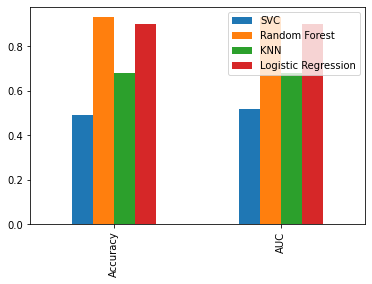

In [ ]:
scores.drop("Loss").plot.bar();

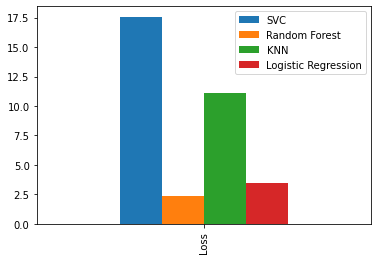

In [ ]:
scores.drop(["Accuracy","AUC"]).plot.bar();